# Wrangling Overdose data (Connecticut 2012-2018

In [1]:
# Load packages

import pandas as pd
import altair as alt
import numpy as np
from collections import defaultdict

# Need to enable this to allow work with larger datasets (https://altair-viz.github.io/user_guide/faq.html)
# alt.data_transformers.enable('json')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## 1. Describe your dataset


#### Accidental drug related deaths 2012-2018 data set (State of Connecticut)

This data is provided by the local government and was retrieved from the following [web page](https://data.ct.gov/). It contains information about reported accidental deaths caused by drug overdose in the state of Connecticut, from January 2012 to December 2018. The dataset contains information about the drug or drugs that were detected in the toxicity report, information from the death certificate and the scene investigation. 

The data was gathered during an investigation held by the Office of the Chief Medical Examiner and is used for preventing purposes.


## 2. Load the dataset

In [2]:
drug_overdose = pd.read_csv("../data/2012-2018_lab4_data_drug-overdose-deaths-connecticut.csv") 

## 3. Explore your dataset

In [3]:
drug_overdose.info()
drug_overdose.describe()
drug_overdose.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 41 columns):
ID                     5105 non-null object
Date                   5103 non-null object
DateType               5103 non-null object
Age                    5102 non-null float64
Sex                    5099 non-null object
Race                   5092 non-null object
ResidenceCity          4932 non-null object
ResidenceCounty        4308 non-null object
ResidenceState         3556 non-null object
DeathCity              5100 non-null object
DeathCounty            4005 non-null object
Location               5081 non-null object
LocationifOther        590 non-null object
DescriptionofInjury    4325 non-null object
InjuryPlace            5039 non-null object
InjuryCity             3349 non-null object
InjuryCounty           2364 non-null object
InjuryState            1424 non-null object
COD                    5105 non-null object
OtherSignifican        169 non-null object
Heroin        

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/2014 0:00,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/2013 0:00,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/2016 0:00,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/2016 0:00,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/2013 0:00,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [4]:
print("This part of the analysis is for other variables:\n")

unique_ethnicities = list(drug_overdose['Race'].unique())
print("There are {0} ethnicities in the dataset, which are: {1}".format(len(unique_ethnicities),
                                                                       unique_ethnicities))

print("")
unique_drugs = list(drug_overdose.loc[:,'Heroin':'OpiateNOS'].columns)
print("This dataset contains information about {0} drugs : {1}".format(len(unique_drugs),
                                                                     unique_drugs))

print("")
unique_locations = list(drug_overdose['Location'].unique())
print("This dataset contains information about {0} locations where the person was found death: {1}".format(len(unique_locations),
                                                                                                          unique_locations))

print("")
unique_manner = list(drug_overdose['MannerofDeath'].unique())
print("This dataset contains information about {0} manners of death: {1}".format(len(unique_manner),
                                                                                    unique_manner))

print("")
print("Each drug tested during the toxicity report has either a Y when it tested positive or a missing value if it tested negative")
unique_heroin = list(drug_overdose['Heroin'].unique())
print("Heroin has the values: {0}".format(unique_heroin))
unique_cocaine = list(drug_overdose['Cocaine'].unique())
print("Cocaine has the values: {0}".format(unique_cocaine))
print("and so on")

This part of the analysis is for other variables:

There are 12 ethnicities in the dataset, which are: [nan, 'Black', 'White', 'Asian, Other', 'Hispanic, White', 'Asian Indian', 'Hispanic, Black', 'Unknown', 'Other', 'Chinese', 'Native American, Other', 'Hawaiian']

This dataset contains information about 16 drugs : ['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS']

This dataset contains information about 7 locations where the person was found death: [nan, 'Hospital', 'Residence', 'Other', 'Nursing Home', 'Convalescent Home', 'Hospice']

This dataset contains information about 6 manners of death: ['Accident', 'accident', nan, 'Pending', 'ACCIDENT', 'Natural']

Each drug tested during the toxicity report has either a Y when it tested positive or a missing value if it tested negative
Heroin has the values: [nan, 'Y']
Coc

## 4. Wrangling

**First**, I'm going to remove the columns I won't use:

In [5]:
drug_overdose_wrangled = drug_overdose.drop(columns = ['ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty',
                                                       'LocationifOther', 'DescriptionofInjury', 'InjuryPlace', 'InjuryCity', 'InjuryState',
                                                       'COD', 'OtherSignifican', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo', 
                                                       'InjuryCounty','AnyOpioid'])

**Second**, I am going to remove the NaNs from column age, date and and manner of death. I chose only this variables because for some variables I think the NaNs are useful to know. In addition, I am just leaving those entries that died accidentally (MannerofDeath == 'Accident')

In [6]:
drug_overdose_wrangled = drug_overdose_wrangled[drug_overdose_wrangled['MannerofDeath'].notnull()]
drug_overdose_wrangled = drug_overdose_wrangled[drug_overdose_wrangled['Age'].notnull()]
drug_overdose_wrangled = drug_overdose_wrangled[drug_overdose_wrangled['Date'].notnull()]
drug_overdose_wrangled = drug_overdose_wrangled[drug_overdose_wrangled['MannerofDeath'].str.contains('[Aa][Cc][Cc][Ii][Dd][Ee][Nn][Tt].*')]

drug_overdose_wrangled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5078 entries, 1 to 5104
Data columns (total 24 columns):
ID                    5078 non-null object
Date                  5078 non-null object
DateType              5078 non-null object
Age                   5078 non-null float64
Sex                   5075 non-null object
Race                  5068 non-null object
Location              5059 non-null object
Heroin                2522 non-null object
Cocaine               1513 non-null object
Fentanyl              2228 non-null object
FentanylAnalogue      389 non-null object
Oxycodone             602 non-null object
Oxymorphone           108 non-null object
Ethanol               1242 non-null object
Hydrocodone           115 non-null object
Benzodiazepine        1337 non-null object
Methadone             473 non-null object
Amphet                159 non-null object
Tramad                130 non-null object
Morphine_NotHeroin    42 non-null object
Hydromorphone         25 non-null object


**Third**, I am going to replace the missing values according to the variables. For the demographics I am writing 'no description'. For the drugs columns, I am going to replace the missing values with 0.

In [7]:
drug_overdose_wrangled = drug_overdose_wrangled.fillna(value = {'Sex' : 'No description',
                                                                'Race' : 'No description',
                                                                'Location' : 'No description'})

drug_overdose_wrangled = drug_overdose_wrangled.fillna(value = 0)

drug_overdose_wrangled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5078 entries, 1 to 5104
Data columns (total 24 columns):
ID                    5078 non-null object
Date                  5078 non-null object
DateType              5078 non-null object
Age                   5078 non-null float64
Sex                   5078 non-null object
Race                  5078 non-null object
Location              5078 non-null object
Heroin                5078 non-null object
Cocaine               5078 non-null object
Fentanyl              5078 non-null object
FentanylAnalogue      5078 non-null object
Oxycodone             5078 non-null object
Oxymorphone           5078 non-null object
Ethanol               5078 non-null object
Hydrocodone           5078 non-null object
Benzodiazepine        5078 non-null object
Methadone             5078 non-null object
Amphet                5078 non-null object
Tramad                5078 non-null object
Morphine_NotHeroin    5078 non-null object
Hydromorphone         5078 non-n

**Fourth**, I changed the date type

In [8]:
drug_overdose_wrangled['Date'] = pd.to_datetime(drug_overdose_wrangled['Date'])

**Fifth**, I am going to gather the drugs into 1 column. Also I changed the toxicity test to 1 and 0, 1 if the result for that drug was positive, 0 otherwise (And fixed some labels in column 'Drug').  I did this in the melted data because it is easier. 

I am going to switch between the pivoted and the melted for visualization purposes.

In [9]:
drug_overdose_wrangled_m = drug_overdose_wrangled.melt(id_vars = ['ID','Date', 'DateType', 'Age', 'Sex', 'Race','Location'],
                                                     value_vars = unique_drugs,
                                                     var_name = 'Drug',
                                                     value_name = 'Toxicity_test',
                                                     )

drug_overdose_wrangled_m.loc[drug_overdose_wrangled_m['Toxicity_test'] != 0, 'Toxicity_test'] = 1
drug_overdose_wrangled_m.loc[drug_overdose_wrangled_m['Toxicity_test'] == 0, 'Toxicity_test'] = 0

drug_overdose_wrangled_m.loc[:, 'Drug'] = drug_overdose_wrangled_m.loc[:, 'Drug'].str.replace('FentanylAnalogue', 'Fentanyl Analogue')
drug_overdose_wrangled_m.loc[:, 'Drug'] = drug_overdose_wrangled_m.loc[:, 'Drug'].str.replace('.*_.*', 'Morphine', regex = True)

drug_overdose_wrangled_m.loc[drug_overdose_wrangled_m['ID'] =='16-0165' , :]

drug_overdose_wrangled_m.to_csv("../data/2012-2018_lab4_data_drug-overdose-deaths-connecticut-wrangled-melted.csv")

drug_overdose_wrangled_m.head()

,ID,Date,DateType,Age,Sex,Race,Location,Drug,Toxicity_test
0,13-0102,2013-03-21,DateofDeath,48.0,Male,Black,Hospital,Heroin,0
1,16-0165,2016-03-13,DateofDeath,30.0,Female,White,Hospital,Heroin,1
2,16-0208,2016-03-31,DateofDeath,23.0,Male,White,Hospital,Heroin,1
3,13-0052,2013-02-13,DateofDeath,22.0,Male,"Asian, Other",Hospital,Heroin,0
4,14-0277,2014-06-29,DateofDeath,23.0,Male,White,Residence,Heroin,1


In [10]:
drug_overdose_wrangled_p = drug_overdose_wrangled_m.pivot_table(index = ['ID','Date', 'DateType', 'Age', 'Sex', 'Race','Location'],
                                                                columns = 'Drug',
                                                                values = 'Toxicity_test').reset_index().set_index('ID')

drug_overdose_wrangled_p.to_csv("../data/2012-2018_lab4_data_drug-overdose-deaths-connecticut-wrangled-pivot.csv")

drug_overdose_wrangled_p.head()

Drug,Date,DateType,Age,Sex,Race,Location,Amphet,Benzodiazepine,Cocaine,Ethanol,...,Heroin,Hydrocodone,Hydromorphone,Methadone,Morphine,OpiateNOS,Other,Oxycodone,Oxymorphone,Tramad
ID,,,,,,,,,,,,,,,,,,,,,
12-0001,2012-01-01,DateofDeath,35.0,Male,White,Residence,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
12-0002,2012-01-03,DateofDeath,41.0,Male,White,Hospital,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
12-0003,2012-01-04,DateofDeath,61.0,Male,Black,Hospital,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12-0004,2012-01-05,DateofDeath,51.0,Male,White,Other,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12-0005,2012-01-07,DateofDeath,45.0,Male,White,Residence,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## 5. Research questions

> **My research questions are:**
>
>- What is the amount of people who die from overdose in Connecticut?
>
>- Do people who died from overdose in Connecticut mixed drugs?
>
>- What is the most common drug found in people who died from overdose and which drug were they more likely to mix it with?

## 6. Data Analysis & Visualizations

#### Code 

**Trend chart**

In [11]:
trend = alt.Chart(drug_overdose_wrangled_p).mark_line(point = True).encode(
            alt.X('year(Date):O', title = 'Reported year of death'),
            alt.Y('count()', title = 'Count of people', scale = alt.Scale(domain=(0, 2000))),
            tooltip = [alt.Tooltip('year(Date)', title = 'Year'),
                       alt.Tooltip('count()', title = 'Count of people')]
        ).properties(
            width = 450,
            height = 300,
            title = "Accidental overdose deaths trend in Connecticut"   
        )

**Number of drugs frequency chart**

In [12]:
drug_overdose_numberd = drug_overdose_wrangled_m.groupby(['ID']).sum().drop(columns = 'Age')

drug_density = alt.Chart(drug_overdose_numberd).mark_area(
                  opacity=0.8,
                  interpolate='step',
                  color = 'teal'
                ).encode(
                  alt.X('Toxicity_test:N', title = 'Number of drugs', scale = alt.Scale(zero = False)),
                  alt.Y('count()', title = 'Count of people'),
                  alt.Tooltip('count()', title = 'Count of people' )
                ).properties(
                  width = 200,
                  height = 300,
                  title = 'Number of drugs that tested positive in toxicity test'
                )


**Positives frequency chart**

In [13]:
drug_overdose_mpdrug = drug_overdose_wrangled_m.groupby(['Drug']).sum().drop(columns = 'Age')\
                                               .sort_values('Toxicity_test', ascending = False).reset_index()

mp_drug = alt.Chart(drug_overdose_mpdrug).mark_bar(
                  opacity=0.8,
                  color = 'teal'
              ).encode(
                  alt.Y('Drug:N', title = '', sort = alt.EncodingSortField(field = 'Toxicity_test', order = 'descending')),
                  alt.X('Toxicity_test:Q', title = 'Times a drug tested positive'),
                  tooltip = [alt.Tooltip('Drug', title = 'Drug'), 
                             alt.Tooltip('Toxicity_test', title = 'Positives')]
              ).properties(
                  width = 70,
                  height = 400,
                  title = 'Drugs in test'
              )

**Combination heatmap**

In [14]:
drug_overdose_comb = defaultdict(lambda: defaultdict(float))
drug_overdose_combrate = defaultdict(lambda: defaultdict(float))
unique_drugs_list = drug_overdose_wrangled_m['Drug'].unique()

drug_overdose_mpdrug = drug_overdose_wrangled_m.groupby(['Drug']).sum().drop(columns = 'Age')

for i in unique_drugs_list:
    for j in unique_drugs_list:
        if i != j:
            drug_overdose_comb[i][j] += drug_overdose_wrangled_p.loc[drug_overdose_wrangled_p.loc[: ,i] == 1, j].sum()
  
for i in drug_overdose_comb.keys():
    sum_keys = drug_overdose_mpdrug.loc[i].sum()
    for j in drug_overdose_comb[i].keys():
        drug_overdose_combrate[i][j] = drug_overdose_comb[j][i] / sum_keys

drug_overdose_comb_df = pd.DataFrame(drug_overdose_comb).reset_index().melt(id_vars = 'index',
                                                                           value_name = 'Count',
                                                                           var_name = 'Second drug')

drug_overdose_combrate_df = pd.DataFrame(drug_overdose_combrate).reset_index().melt(id_vars = 'index',
                                                                           value_name = 'Percentage',
                                                                           var_name = 'Second drug')

positives_chart = alt.Chart(drug_overdose_combrate_df).mark_rect().encode(
                    alt.X('index:N', title = 'Drug 2',
                          sort = ['Heroin', 'Any Opioid', 'Fentanyl', 'Cocaine', 'Benzodiazepine', 'Ethanol', 'Oxycodone',
                                 'Methadone', 'Other', 'Fentanyl Analogue', 'Amphet', 'Tramad', 'Hydrocodone',
                                  'Oxymorphone','OpiateNOS', 'Morphine', 'Hydromorphone']),
                    alt.Y('Second drug:N', title = 'Drug 1',
                          sort = ['Heroin', 'Any Opioid', 'Fentanyl', 'Cocaine', 'Benzodiazepine', 'Ethanol', 'Oxycodone',
                                 'Methadone', 'Other', 'Fentanyl Analogue', 'Amphet', 'Tramad', 'Hydrocodone',
                                  'Oxymorphone','OpiateNOS', 'Morphine', 'Hydromorphone']),
                    alt.Color('Percentage:Q', scale=alt.Scale(scheme="purplebluegreen"), legend = alt.Legend(format='%',
                                                                                                            orient="right")),
                    tooltip = [alt.Tooltip('Second drug', title = 'Drug 1'),
                               alt.Tooltip('index', title = 'Drug 2'),
                               alt.Tooltip('Percentage', format = ".1%")]
                ).properties(
                    width = 400,
                    height = 400,
                    title = 'Proportion of people that tested positive for drug 2, given that they tested positive for drug 1'
                )


### Results

**Accidental overdose deaths trend and number of drugs present in toxicity test**

In total, 5,078 people died from drug overdose in Connecticut from January 2012 to December 2018


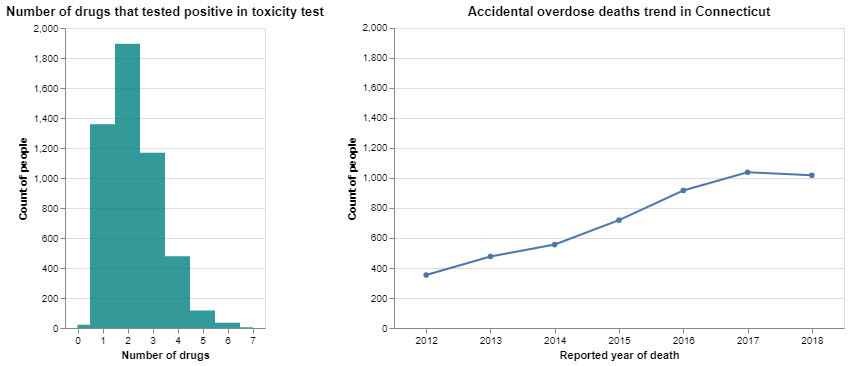

In [15]:
print("In total, {0:,.0f} people died from drug overdose in Connecticut from January 2012 to December 2018".format(len(drug_overdose_wrangled_p['Date'])))

(drug_density | trend).configure_axisX(labelAngle = 0)

**Drug combinations**

There were 16 drugs tested


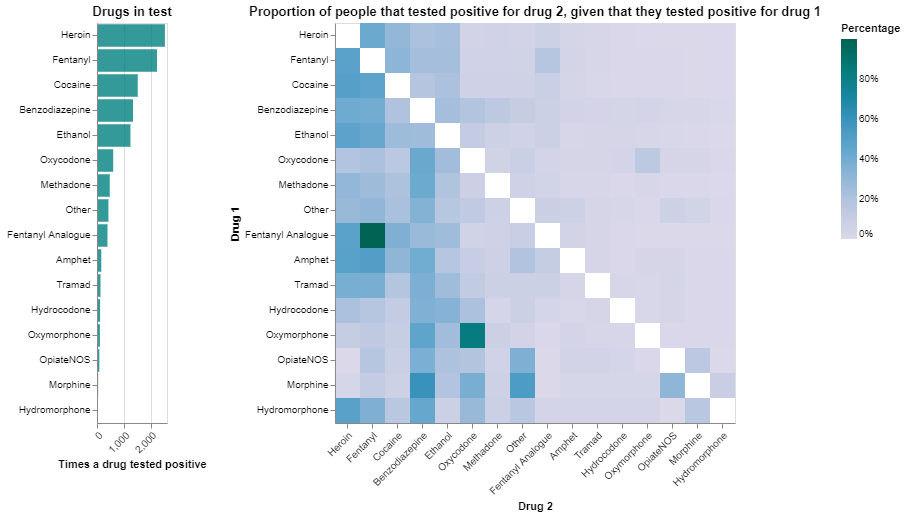

In [361]:
print("There were {0:,.0f} drugs tested".format(len(drug_overdose_mpdrug['Toxicity_test'])))

(mp_drug | positives_chart).configure_axisX(labelAngle = -45)

## 8. Summary and conclusions

**Findings:**

>- The tendency of deaths caused by accidental overdose has increased by time in Connecticut. There were 353 people who died due to accidental overdose in 2012, compared with 1,308 in 2017 and 1,018 in 2018.
>
>- Most people who died tested positive for 2 drugs (1,895 people).
>
>- 873 people tested positive for 1 drug, 1,384 people tested positive for 3 drugs, 871 for 4 drugs, 344 for 5 drugs, 79 for 6  drugs and 21 for 7.
>
>- The drug that tested positive the most time was Heroin (present in 2,522 people), followed by fentanyl (2,228 people). The drug that tested positive the least times was Hydromorphone.
>
>- Oxymorphone is a metabolite of oxycodone, therefore, 82.4% who tested positive for oxymorphone tested positive for oxycodone. However, according to the [American Society of Regional Anesthesia and Pain Medicine (ASRA)](https://www.asra.com/asra-news/article/75/urine-drug-screens-for-opioid-maintenanc), there might be a chance of not finding oxymorphone when tested positive for oxycodone. This is why 14,8% of people who tested positive for oxycodone tested positive for oxymorphone.
>
>-  42.0% of the people who tested positive for heroin tested positive for fentanyl. 29.0% tested positive for cocaine. Please remind that a person could have taken heroin, fentanyl and cocaine. Therefore, people who took heroin and tested positive for fentanyl also, could have tested positive for cocaine.
>
>- 47,6% of people who tested positive for fentanyl tested positive for heroin.

**Conclusion (Answer to my research question):**
> In total, 5,078 people died from accidental overdose from 2012 to 2018 in Connecticut. The deaths have an increasing trend amongst these years (from 353 in 2012 to over 1000 in 2018). In addition, most people (1,895) tested positive for 2 drugs. Which means that people who died from overdose were more likely to mix drugs.
>
>Finally, The most common drug found in people who died from overdose was heroin. This drug was more likely mixed with fentanyl. 

>(As a side note, people who were found death from overdose were more likely to mix opioids rather than other drugs, such as mixing heroin with cocaine. I thought it was more common. Or we can ask the following question: Are people more likely to die if they mix opioids? but we would have to know how many people tried them and of those people, who died)